In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
train = pd.read_csv('dataset/cars.csv')

In [11]:
train.sample(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
295,Hyundai i10 Magna 1.2,Hyderabad,2010,74000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,3.10
575,Hyundai Santro Xing XO,Chennai,2006,83072,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.40
3774,Maruti Ciaz Zeta,Kochi,2018,10575,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,11.11 Lakh,9.18


# Exploratory Data Analysis

In [12]:
print(f'The size of the train set is {train.shape}')

The size of the train set is (6019, 13)


In [13]:
print(f"The features in the dataset are \n {train.columns.to_list()}")

The features in the dataset are 
 ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']


In [14]:
# listing all the columns along with their data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


__Observations__
- Some of the columns such as 'Mileage', 'Engine', 'Power, 'Seats', 'New_Price' contain Null values
- The column 'New_Price' mostly contain Null values
- Even columns such as 'Mileage', 'Engine', etc are of type 'object', not 'float'. So we have to exatract numerical values from these columns and convert to appropriate dtypes

In [15]:
# extracting numerical values from "Mileage" column
train.Mileage = train.Mileage.str.extract("(.*)(?=\ )").astype('float')
train.Mileage.dtypes

dtype('float64')

In [16]:
# similary extracting numerical values only from 'Engine', 'Power' columns
train.Engine = train.Engine.str.extract("(\d+)(?=\ )").astype('float')
train.Power = train.Power.str.extract("(\d+.\d*)").astype('float')

__Missing values__

In [17]:
# missing values in the train set
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0]
missing_train

Mileage         2
Engine         36
Power         143
Seats          42
New_Price    5195
dtype: int64

since most of the values in 'New_Price' are Null, we can drop that column

In [18]:
train.drop(['New_Price'], axis=1, inplace=True)

In [19]:
# dropping the training examples containing NaN values
train.dropna(inplace=True)

In [20]:
# listing all the null values
train.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

- The dataset contain no more NaN values

__Univaraite Analaysis__

<Figure size 720x720 with 0 Axes>

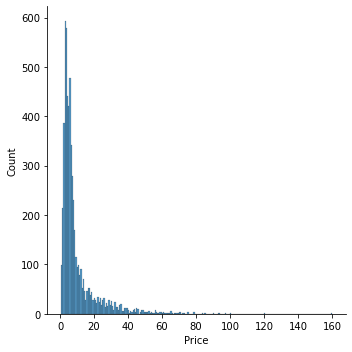

In [22]:
# the distribution of the target variable 'Price'
plt.figure(figsize=(10, 10))
sns.displot(data=train, x=train.Price, kind='hist')
plt.show()

- The distribution of target feature 'Price' is right skewed. Therefore there are a few cars in the dataset which are highly priced.

In [23]:
train.Price.describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

- As we can see the 75th percentile is 9.95 laks while the maximum Priced car has price of 1 crore 60 lakhs

In [24]:
# some of the really expensive cars in the dataset
train.loc[train.Price > 100]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,120.0


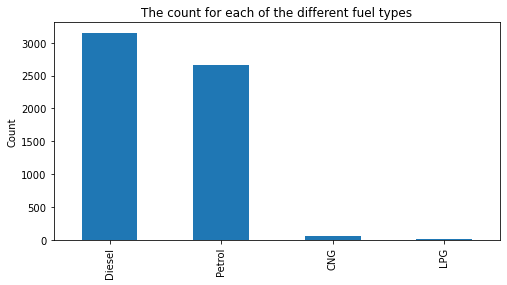

In [25]:
# explorint the feature 'Fuel_Type'
plt.figure(figsize=(8, 4))
plt.ylabel('Count')
plt.title('The count for each of the different fuel types')
train.Fuel_Type.value_counts().plot.bar()
plt.show()

__Observations__
- The majority of cars are Diesel and Petrol cars
- There are very few CNG, LPG, and Electric cars

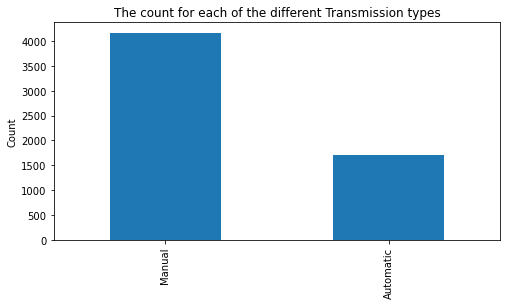

In [26]:
# explorint the feature 'Transmission'
plt.figure(figsize=(8, 4))
plt.ylabel('Count')
plt.title('The count for each of the different Transmission types')
train.Transmission.value_counts().plot.bar()
plt.show()

__Observations__
- Majority of the cars have Manual Transmission

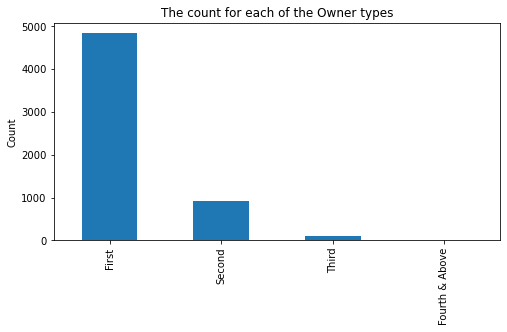

In [27]:
# explorint the feature 'Owner_Type'
plt.figure(figsize=(8, 4))
plt.ylabel('Count')
plt.title('The count for each of the Owner types')
train.Owner_Type.value_counts().plot.bar()
plt.show()

__Observations__
- Regarding ownership, majority of the cars are First ownered
- Followed by some Second owners and few Third Owners and negligible number of Fourth & Above owerners

__Bivariate Analysis__

<AxesSubplot:>

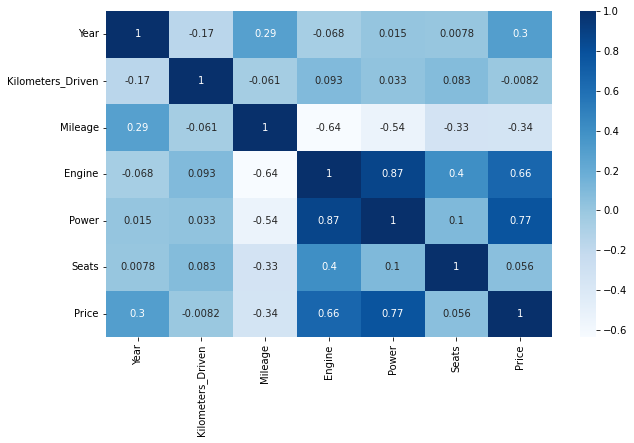

In [29]:
plt.figure(figsize=(10, 6))
# heat map for correlation
sns.heatmap(train.corr(), cmap='Blues', annot=True)

__Observations__
- features 'Engine', 'Power', 'Year' are positively correlated with 'Price' <br>
As the engine size increases, the price of the car increases. Similarly, as the power of the car increases, the price increases. Newer cars tend to have higher Price
- The feature Seats does not have strong correlation with Price

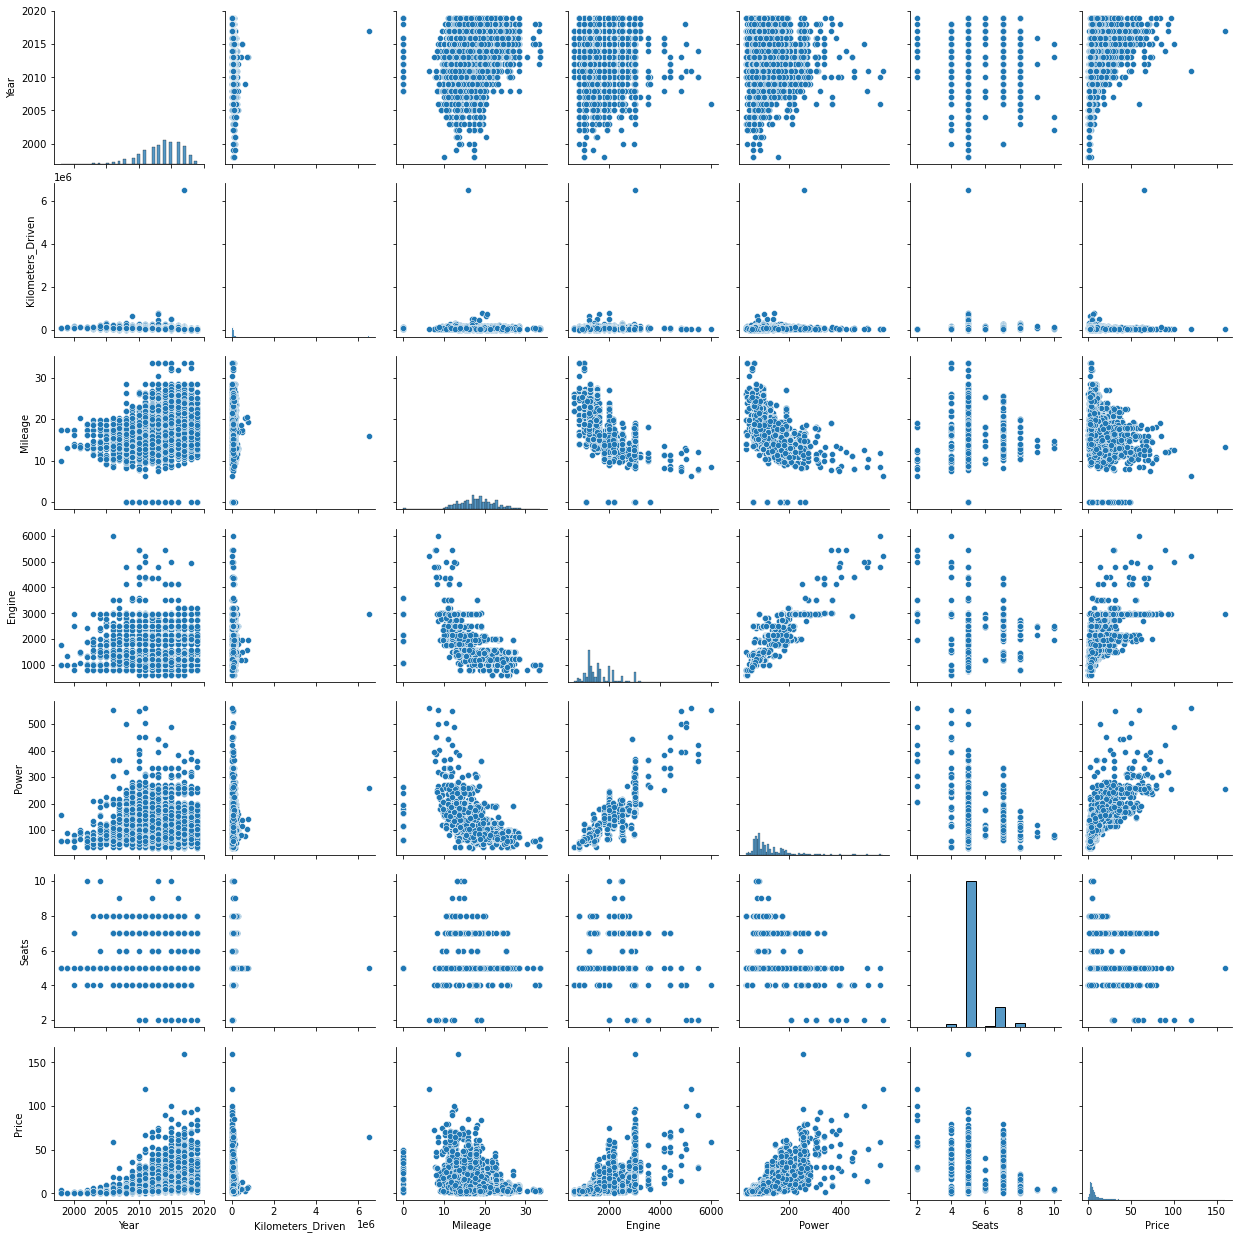

In [30]:
# pairplot
sns.pairplot(data=train)

__Observations__
- As the year increases, the price increases. Newer cars tend to have higher price.
- There are some outliers in the Year-Price plot
- There is an extreme outlier in Kilometers_Driven-Price plot
- There is a strong postive correlation between 'Engine' and 'Price'. Which means, As the engine size increases, the price increases
- Similarly as the power increases, the price increases
- There is presence of outliers in 'Engine', 'Power' column. 
- Number of seats and Price of the car have no strong correlation

__Outlier detection and Removal__

In [31]:
train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


__Observations__
- The minimum 'Mileage' is 0, which is practically impossible. So can be some outliers

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

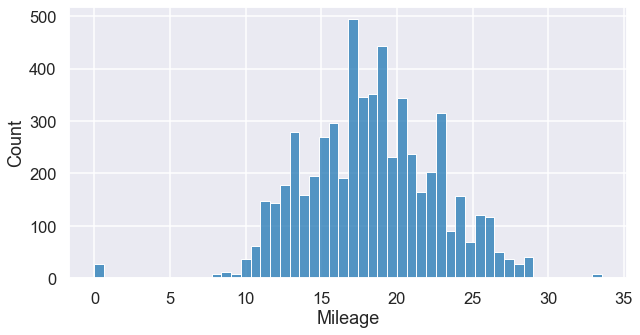

In [32]:
# the histogram of the feature 'Mileage'
plt.figure(figsize=(10, 5))
sns.set_context('talk')
sns.set_style('darkgrid')
sns.histplot(train.Mileage)

- There are a bunch of entries for which the Mileage is 0. These are outliers

In [33]:
# the number of training examples for which Mileage is 0
train[train.Mileage == 0].shape[0]

28

In [34]:
# we can drop these outliers for which Mileage is 0
train = train[~(train.Mileage == 0)]

<AxesSubplot:title={'center':'The relation between Year and Price'}, xlabel='Year', ylabel='Price'>

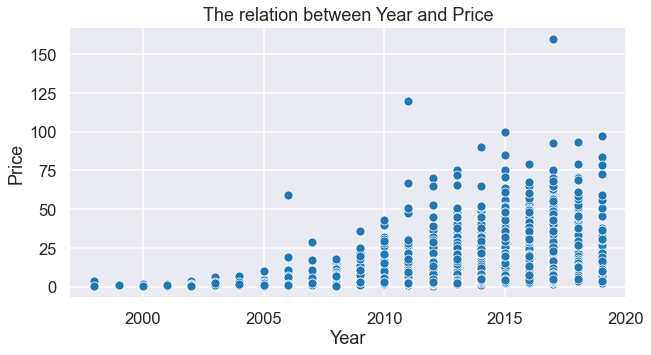

In [35]:
# the relation between 'Year' and 'Price'
plt.figure(figsize=(10, 5))
sns.set_context('talk')
sns.set_style('darkgrid')
plt.title('The relation between Year and Price')
sns.scatterplot(x=train.Year, y=train.Price, data=train)

we can remove the three outlier points in the data.<br>
The outlier points are

In [36]:
# first outlier point
train[(train['Year'] == 2006) & (train.Price > 40)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.6,5998.0,552.0,4.0,59.0


In [37]:
# the second outlier point
train[(train['Year'] == 2011) & (train.Price > 100)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4,5204.0,560.0,2.0,120.0


In [38]:
# third outlier point
train[(train['Year'] == 2017) & (train.Price > 140)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0


In [39]:
# removing the outlier points
train = train[~((train['Year'] == 2006) & (train.Price > 40))]
train = train[~((train['Year'] == 2011) & (train.Price > 100))]
train = train[~((train['Year'] == 2017) & (train.Price > 140))]

<AxesSubplot:title={'center':'The relation between Year and Price'}, xlabel='Year', ylabel='Price'>

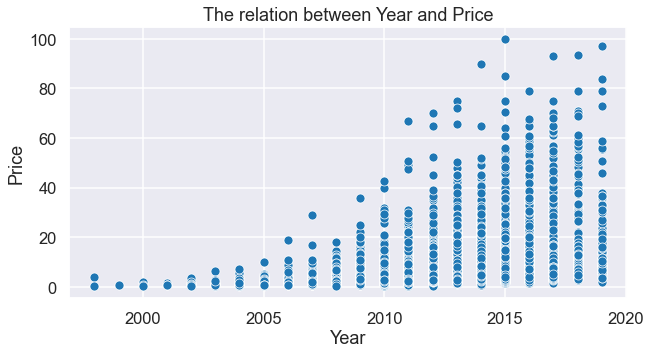

In [40]:
# the relation between "Year" and "Price"
plt.figure(figsize=(10, 5))
plt.title('The relation between Year and Price')
sns.scatterplot(x=train.Year, y=train.Price, data=train)

so we have successfully removed the three outlier points.

<AxesSubplot:title={'center':'The relation between Kilometers_Driven and Price'}, xlabel='Kilometers_Driven', ylabel='Price'>

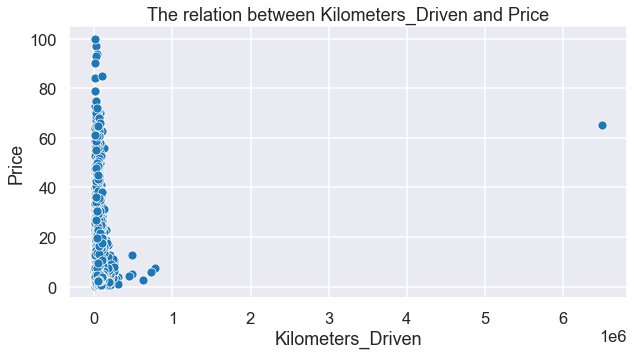

In [41]:
# the relation between 'Kilometers_Driven' and 'Price'
plt.figure(figsize=(10, 5))
plt.title('The relation between Kilometers_Driven and Price')
sns.scatterplot(x=train.Kilometers_Driven, y=train.Price,
                data=train)

- There is one extreme outlier point.

In [42]:
# the outlier point is
train[train.Kilometers_Driven > 1000000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0


In [43]:
# removing the outlier point
train = train[~(train.Kilometers_Driven > 1000000)]

<AxesSubplot:title={'center':'The relation between Kilometers_Driven and Price'}, xlabel='Kilometers_Driven', ylabel='Price'>

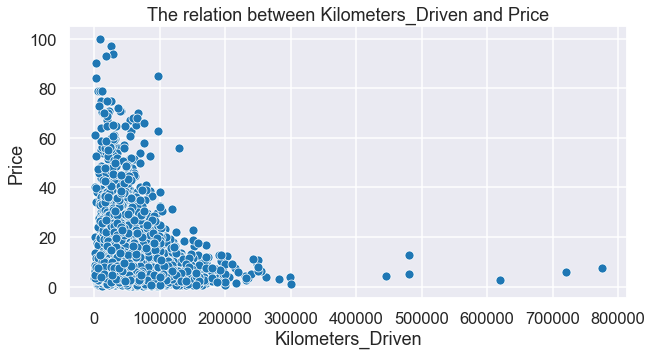

In [44]:
# the relation between 'Kilometers_Driven' and 'Price'
plt.figure(figsize=(10, 5))
plt.title('The relation between Kilometers_Driven and Price')
sns.scatterplot(x=train.Kilometers_Driven, y=train.Price,
                data=train)

- Now we can see that, the points greater than 400000 are also outlier points

In [45]:
# the outlier points are
train[train.Kilometers_Driven > 400000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,7.50
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,2.70
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.90
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,4.45


In [46]:
# we can remove those outlier points
train = train[~(train.Kilometers_Driven > 400000)]

<AxesSubplot:title={'center':'The relation between Kilometers_Driven and Price'}, xlabel='Kilometers_Driven', ylabel='Price'>

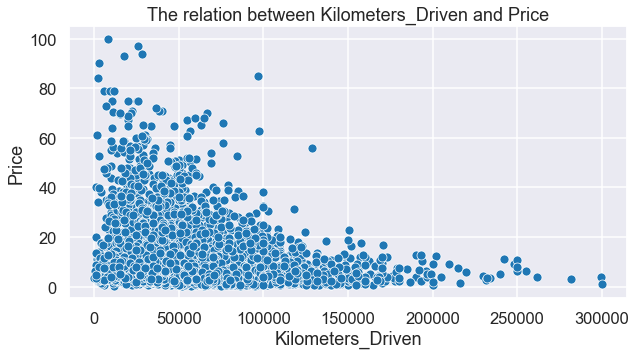

In [47]:
# the relation between 'Kilometers_Driven' and 'Price'
plt.figure(figsize=(10, 5))
plt.title('The relation between Kilometers_Driven and Price')
sns.scatterplot(x=train.Kilometers_Driven, y=train.Price,
                data=train)

- There are some more outlier points, which are not extreme, by the way

In [48]:
# one of the outlier points is
train[(train.Kilometers_Driven > 90000) & (train.Price > 80)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5535,BMW X6 xDrive 40d M Sport,Ahmedabad,2015,97003,Diesel,Automatic,First,15.87,2993.0,308.43,5.0,85.0


In [49]:
# removing the outlier point
train = train[~((train.Kilometers_Driven > 90000) & (train.Price > 80))]

In [50]:
# another outlier point
train[(train.Kilometers_Driven > 100000) & (train.Price > 40)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
489,Mercedes-Benz GLS 350d 4MATIC,Pune,2017,129000,Diesel,Automatic,First,11.0,2987.0,258.0,7.0,56.0


In [51]:
# removing the outlier point
train = train[~((train.Kilometers_Driven > 100000) & (train.Price > 60))]

In [53]:
# another outlier point
train[(train.Kilometers_Driven > 90000) & (train.Price > 40)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
327,Audi Q7 45 TDI Quattro Technology,Coimbatore,2017,97430,Diesel,Automatic,First,14.75,2967.0,245.0,7.0,62.67
489,Mercedes-Benz GLS 350d 4MATIC,Pune,2017,129000,Diesel,Automatic,First,11.00,2987.0,258.0,7.0,56.00


In [54]:
# removing the outlier points
train = train[~((train.Kilometers_Driven > 90000) & (train.Price > 40))]

<AxesSubplot:title={'center':'The relation between Kilometers_Driven and Price'}, xlabel='Kilometers_Driven', ylabel='Price'>

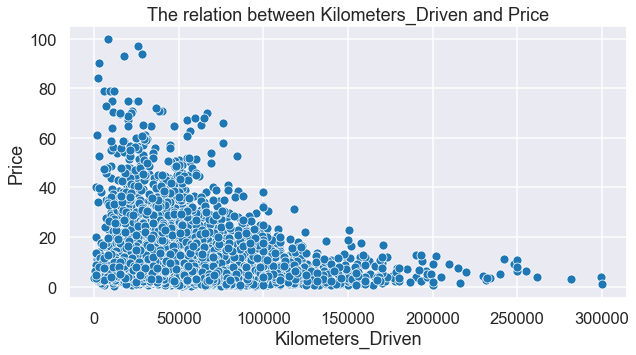

In [55]:
# the relation between 'Kilometers_Driven' and 'Price'
plt.figure(figsize=(10, 5))
plt.title('The relation between Kilometers_Driven and Price')
sns.scatterplot(x=train.Kilometers_Driven, y=train.Price,
                data=train)

so we have successfully removed corresponding outlier points

<AxesSubplot:title={'center':'The relation between Kilometers_Driven and Price'}, xlabel='Kilometers_Driven', ylabel='Price'>

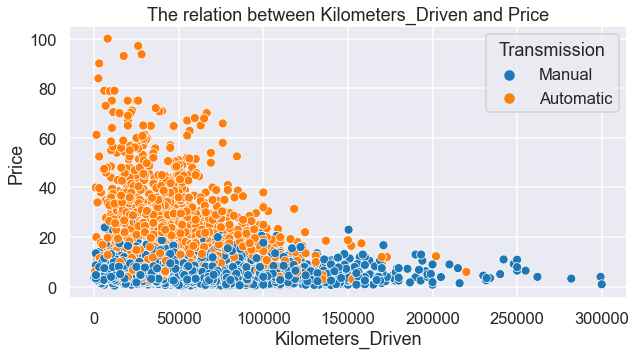

In [56]:
# the relation between 'Kilometers_Driven' and 'Price'
# with respect to the 'Transmission'
plt.figure(figsize=(10, 5))
plt.title('The relation between Kilometers_Driven and Price')
sns.scatterplot(x=train.Kilometers_Driven, y=train.Price,
                data=train, hue='Transmission')

__Observations__
- As the Kilometers_Driven increases, the Price tends to decreases
- Many of the cars which are driven less kilometers are Automatic cars
- Automatic cars tend to have higher Price compared to Manual cars for the same range of 'Kilometers_Driven'

<AxesSubplot:title={'center':'The relation between Mileage and Price'}, xlabel='Mileage', ylabel='Price'>

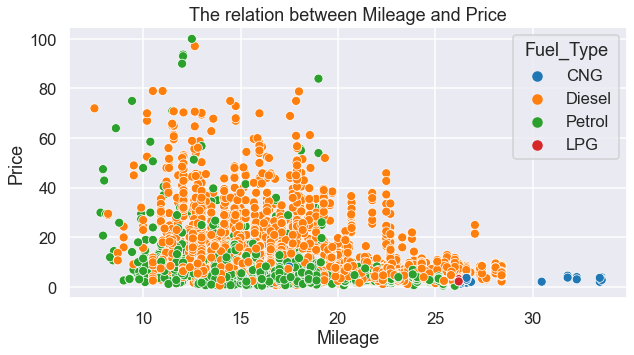

In [57]:
# The relation between 'Mileage' and 'Price'
plt.figure(figsize=(10, 5))
plt.title('The relation between Mileage and Price')
sns.scatterplot(x=train.Mileage, y=train.Price,
                data=train, hue='Fuel_Type')

__Observation__
- There are very few CNG models which have very high mileage of more than 30. These points are outliers

In [58]:
# the outlier points are
train.loc[train.Mileage > 30]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44,796.0,40.30,4.0,3.50
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54,998.0,67.04,5.0,2.96
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,3.05
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,3.90
2701,Maruti Celerio CNG VXI MT,Kochi,2016,70536,CNG,Manual,First,31.79,998.0,58.33,5.0,4.58
3119,Maruti Alto K10 LXI CNG Optional,Kochi,2018,44202,CNG,Manual,First,32.26,998.0,58.20,4.0,4.00
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,3.25
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44,796.0,40.30,4.0,3.00
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44,796.0,40.30,4.0,2.10
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54,998.0,67.04,5.0,2.85


In [59]:
# removing the outlier point
train = train.loc[~(train.Mileage > 30)]

<AxesSubplot:title={'center':'The relation between Mileage and Price'}, xlabel='Mileage', ylabel='Price'>

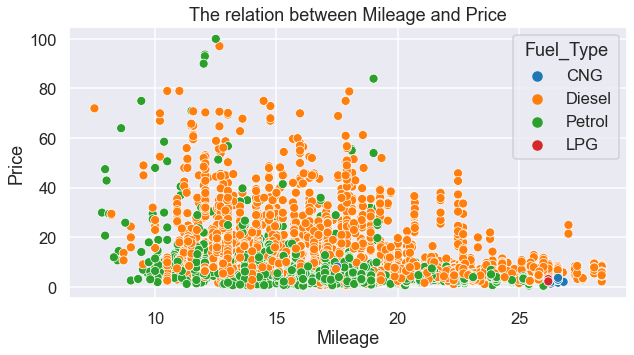

In [60]:
# The relation between 'Mileage' and 'Price'
plt.figure(figsize=(10, 5))
plt.title('The relation between Mileage and Price')
sns.scatterplot(x=train.Mileage, y=train.Price,
                data=train, hue='Fuel_Type')

We have removed the above shown outlier points successfully

<AxesSubplot:title={'center':'The relation between Engine and Price'}, xlabel='Engine', ylabel='Price'>

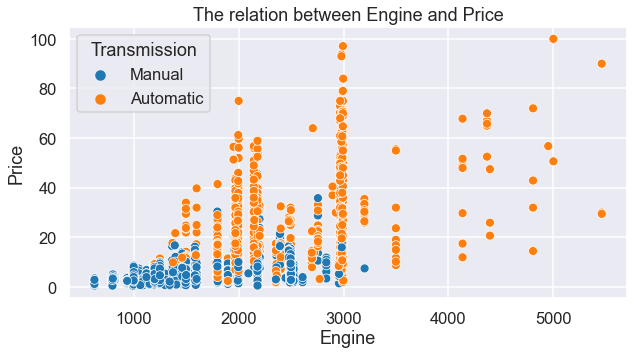

In [61]:
# the relation between 'Engine' and 'Price'
plt.figure(figsize=(10, 5))
plt.title('The relation between Engine and Price')
sns.scatterplot(x=train.Engine, y=train.Price,
                data=train, hue='Transmission')

__Observations__
- As the engine displacement increases, the price of the car also increases
- Automatic cars tend to have higer engine displacement compared to petrol cars

<AxesSubplot:title={'center':'The relation between Power and Price'}, xlabel='Power', ylabel='Price'>

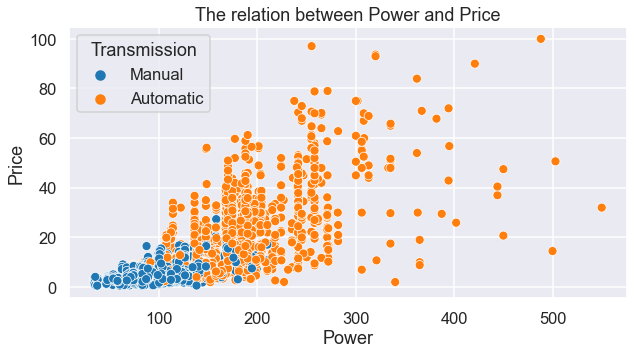

In [62]:
# the relation between 'Power' and 'Price'
plt.figure(figsize=(10, 5))
plt.title('The relation between Power and Price')
sns.scatterplot(x=train.Power, y=train.Price,
                data=train, hue='Transmission')

__Observations__
- There is strong correlation between Power and Price
- Automatic cars tend to have higher Power compared to Manual cars, hence higher Price also

<AxesSubplot:title={'center':'The relation between Seats and Price'}, xlabel='Seats', ylabel='Price'>

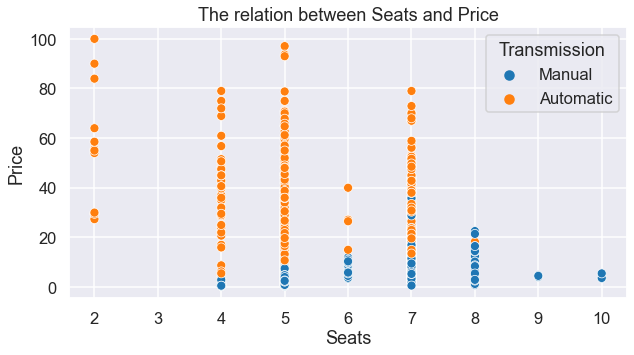

In [63]:
# the relation between 'Seats' and 'Price'
plt.figure(figsize=(10, 5))
plt.title('The relation between Seats and Price')
sns.scatterplot(x=train.Seats, y=train.Price,
                data=train, hue='Transmission')

__Observations__
- There is no strong correlation between the number of seats and the Price
- Majority of the cars have Seats, between 4 and 8

__Outlier detection and removal using Percentiles__

Exploring the 5th and 99.5th percentile of features "Engine", "Power", "Seats" respectively

In [65]:
# the 5th percentile and 99.5th percentile
print(f"The 5th and 99.5th percentile of 'Engine' is \
{np.percentile(a=train.Engine, q=[0.5, 99.5])}")

print(f"The 5th and 99.5th percentile of 'Power' is \
{np.percentile(a=train.Power, q=[0.5, 99.5])}")

print(f"The 5th and 99.5th percentile of 'Seats' is \
{np.percentile(a=train.Seats, q=[0.5, 99.5])}")

The 5th and 99.5th percentile of 'Engine' is [ 796. 3498.]
The 5th and 99.5th percentile of 'Power' is [ 37.  335.2]
The 5th and 99.5th percentile of 'Seats' is [4. 8.]


we can consider, let's say all the points below 5th percentle and above 99.5th percentile as outliers

In [66]:
# counting the number of outlier examples in each feature
outlier_features = ["Engine", "Power", "Seats"]

for feature in outlier_features:
    low_lmt, upp_lmt = np.percentile(a=train[feature], q=[0.5, 99.5])
    print("The column " + "'" + feature + "' " + "contains " +
          str(train[(train[feature] < low_lmt) | (train[feature] > upp_lmt)].shape[0])
          + " outliers")

The column 'Engine' contains 55 outliers
The column 'Power' contains 50 outliers
The column 'Seats' contains 19 outliers


In [67]:
# removing those outliers
outlier_features = ["Engine", "Power", "Seats"]

for feature in outlier_features:
    low_lmt, upp_lmt = np.percentile(a=train[feature], q=[0.5, 99.5])
    train = train[~((train[feature] < low_lmt) | (train[feature] > upp_lmt))]

# Feature Engineering